<a href="https://colab.research.google.com/github/PrernaMaurya/Stock-market-data-analyst-/blob/main/stock_market(data_analyst).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
##Upload the Dataset in Google Colab

from google.colab import files
uploaded = files.upload()

Saving stocks.csv to stocks.csv


**EXPLANATION:**
I started by uploading the dataset into the Colab environment using files.upload(). This function creates a UI that allows manual selection of local files. It’s ideal for quick uploads when working interactively in Google Colab.

In [ ]:
import pandas as pd

# Load the CSV (make sure name matches exactly)
df = pd.read_csv('stocks.csv')

# Show the first 5 rows
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


**EXPLANATION:**
Once the file was uploaded, I used pandas.read_csv() to load the contents into a DataFrame named df. The .head() function was used to preview the first few records and verify the successful load of the dataset.

# **Explore the Dataset Structure**

In [ ]:
# Check the number of rows and columns
print("Dataset Shape (rows, columns):", df.shape)

# List all column names
print("\nColumn Names:")
print(df.columns)

# Get full info about data types and missing values
print("\nDetailed Info:")
df.info()

Dataset Shape (rows, columns): (248, 8)

Column Names:
Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

Detailed Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


**EXPLANATION:**
Before processing the dataset, I explored its structure using .shape, .columns, and .info(). This allowed me to confirm that all expected columns (like Date, Ticker, Open, Close, Volume) were present, and also helped identify if any data was missing or had incorrect formats.

# **Clean the Dataset**

In [ ]:
# 1. Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 2. Sort the dataset by Date
df = df.sort_values('Date')

# 3. Check for missing values
print("Missing values in each column:\n")
print(df.isnull().sum())

Missing values in each column:

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**EXPLANATION:**
This block handles basic time-series cleaning: date formatting, sorting by date, and identifying any missing values. These steps ensure that future calculations like moving averages, returns, and trend visualizations are accurate.

# **EDA — Visualize Stock Price Trends Over Time**

Understand how each company’s stock price has moved over time using line plots. This gives you visual insight into price behavior, trends, and patterns.

1️⃣ Plot stock closing price by ticker

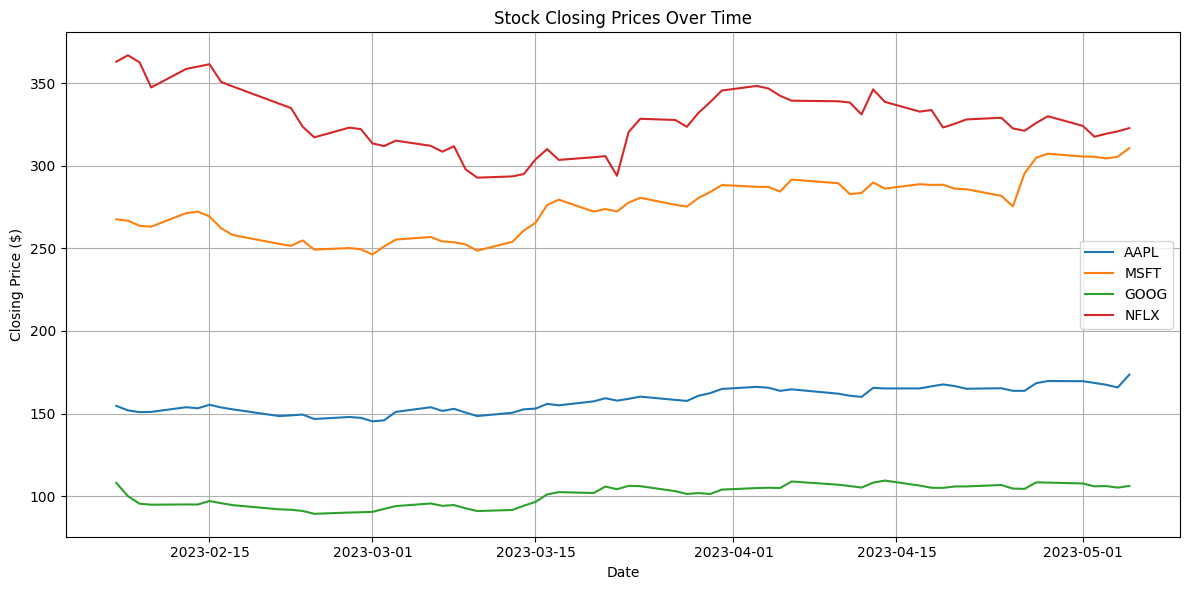

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Loop through each unique company (ticker)
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=ticker)

# Add title and labels
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**EXPLANATION:**
This visualization shows how the closing prices of each company (AAPL, MSFT, NFLX, GOOG) evolved over the last few months. I used a loop to group the data by ticker and created a clean, readable multi-line plot

# **Visualize Trading Volume Over Time**

Understand which stocks had higher trading activity and spot volume spikes (which often happen around news or earnings).

**🔹Volume Comparison Line Plot**

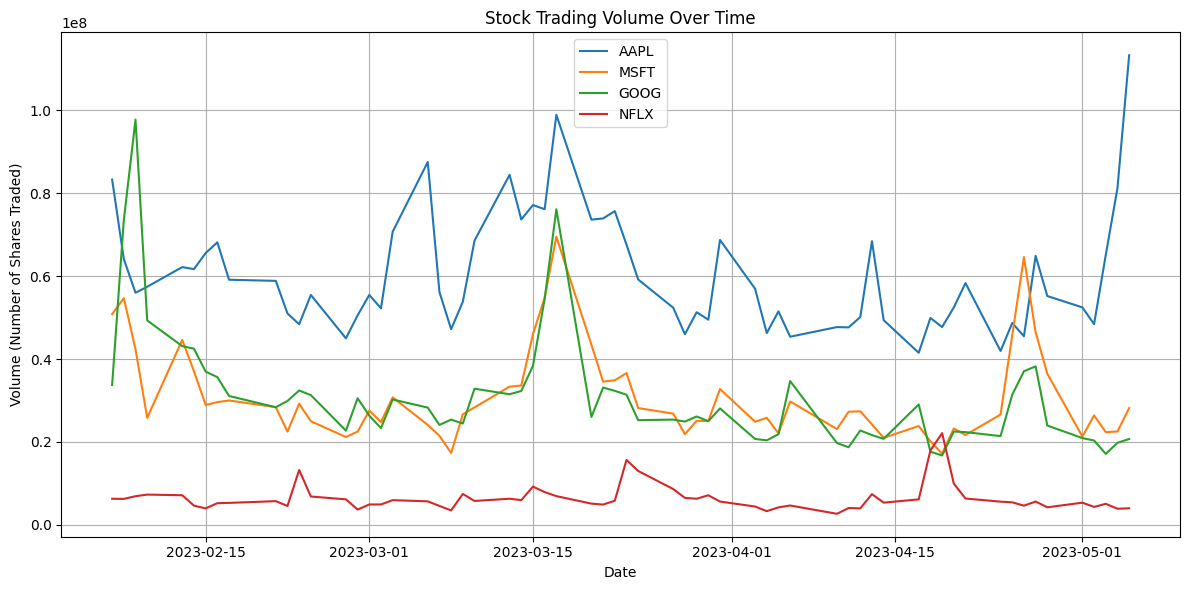

In [ ]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Loop through each stock and plot volume
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Volume'], label=ticker)

# Add chart labels and title
plt.title('Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Number of Shares Traded)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**EXPLANATION:**
This line plot compares the trading volume of all four companies across the same time period. It highlights which stock had more market activity and on what days volume surged — often linked to major events like earnings reports or news.”

**Why Volume Is Important:**
-High volume often means high investor interest or news impact
-Useful for pairing with price trends to explain spikes or dips

# **Calculate & Plot Moving Averages (7-day and 30-day)**

Smooth out daily fluctuations to identify short-term (7-day) and medium-term (30-day) trends in stock prices.

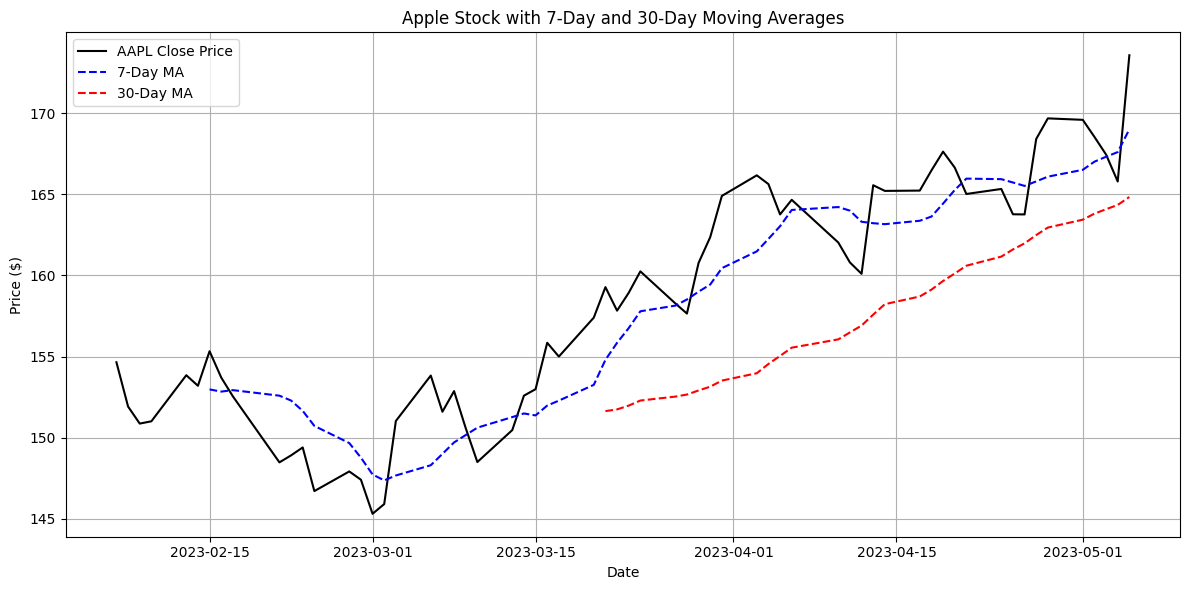

In [ ]:
# Filter Apple (AAPL) stock data
apple = df[df['Ticker'] == 'AAPL'].copy()

# Calculate 7-day and 30-day moving averages
apple['MA_7'] = apple['Close'].rolling(window=7).mean()
apple['MA_30'] = apple['Close'].rolling(window=30).mean()

# Plot the closing price and moving averages
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(apple['Date'], apple['Close'], label='AAPL Close Price', color='black')
plt.plot(apple['Date'], apple['MA_7'], label='7-Day MA', color='blue', linestyle='--')
plt.plot(apple['Date'], apple['MA_30'], label='30-Day MA', color='red', linestyle='--')

plt.title('Apple Stock with 7-Day and 30-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**EXPLANATION:**
Moving averages are used to analyze trends by smoothing out price fluctuations. The 7-day MA captures short-term movements, while the 30-day MA shows broader trends. This visualization helps identify bullish (MA rising) or bearish (MA falling) signals.

# **Calculate & Plot Rolling Volatility**

Volatility helps understand how much the stock price fluctuates. We’ll calculate rolling standard deviation of daily returns — the higher it is, the more volatile the stock.

**🔹 Step-by-Step (Using Apple’s Data as an Example)**

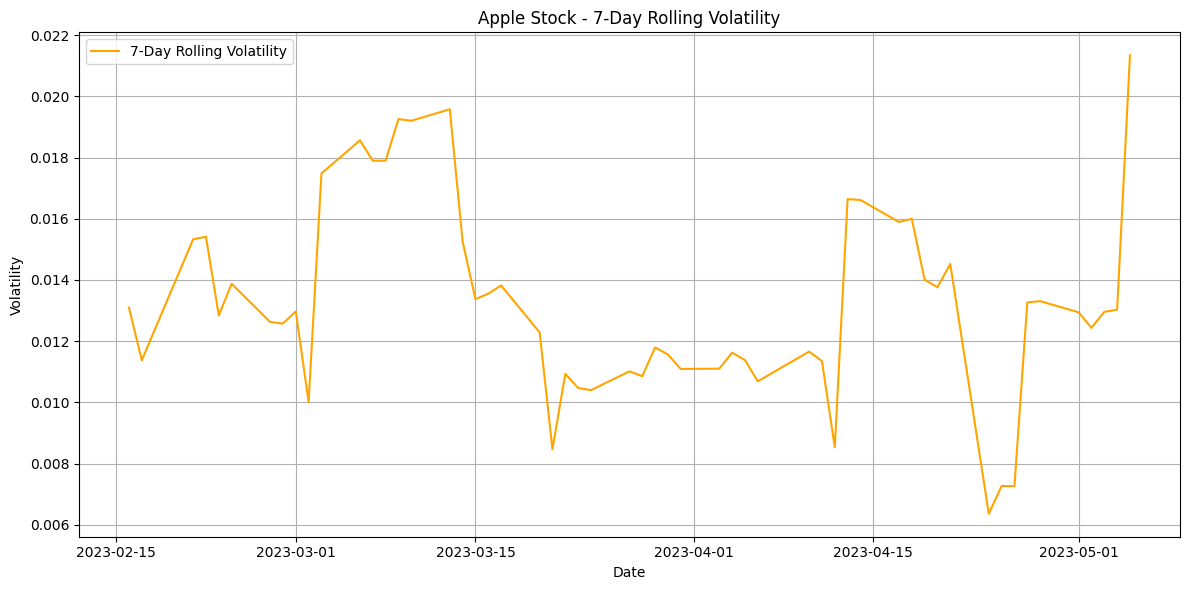

In [ ]:
# Filter Apple stock
apple = df[df['Ticker'] == 'AAPL'].copy()

# 1. Calculate daily returns
apple['Daily Return'] = apple['Close'].pct_change()

# 2. Calculate 7-day rolling volatility
apple['Volatility_7'] = apple['Daily Return'].rolling(window=7).std()

# 3. Plot volatility over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(apple['Date'], apple['Volatility_7'], color='orange', label='7-Day Rolling Volatility')
plt.title('Apple Stock - 7-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**EXPLANATION:**
Volatility reflects how much a stock’s price fluctuates over time. I first calculated daily percentage change using .pct_change(), then applied a 7-day rolling window to compute the standard deviation of returns — a common proxy for volatility in finance.

# **Correlation Between Stocks**

Understand how closely the stock prices move together — for example, do Apple and Microsoft rise and fall at the same time?

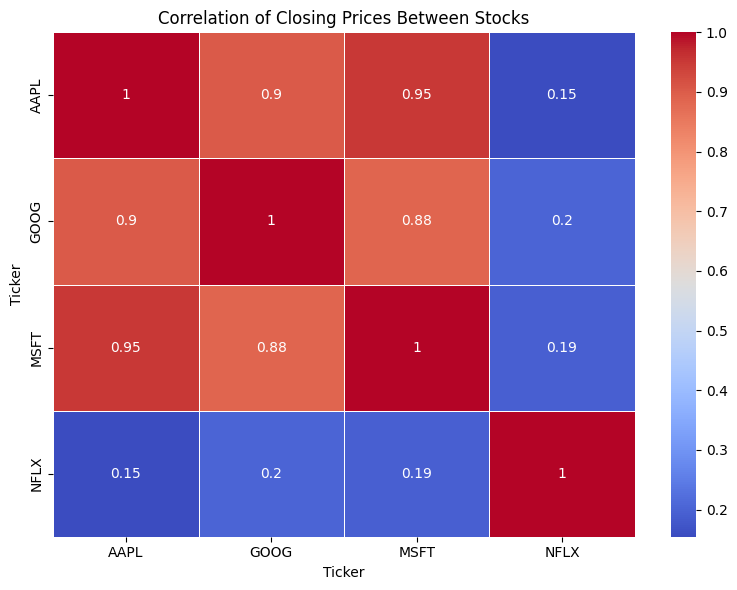

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Pivot the dataset — each column is a stock, rows are dates
pivot_close = df.pivot(index='Date', columns='Ticker', values='Close')

# Step 2: Calculate the correlation matrix
correlation = pivot_close.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Closing Prices Between Stocks')
plt.tight_layout()
plt.show()

**EXPLANATION:**
I first pivoted the data so each company’s closing price became a column. Then, I used .corr() to compute the Pearson correlation between all stock pairs. A heatmap visually shows which stocks move together — values close to +1 mean high correlation.

# **Predict Stock Closing Price with Linear Regression**

Use basic machine learning to predict the stock’s closing price based on other features like Open, High, Low, and Volume.

We'll demonstrate this using Apple (AAPL) data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filter Apple stock data
apple = df[df['Ticker'] == 'AAPL'].copy()

# Drop rows with missing values (e.g., from moving averages or returns)
apple = apple.dropna()

# Step 1: Define input (X) and target (y)
X = apple[['Open', 'High', 'Low', 'Volume']]
y = apple['Close']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R-squared Score:", round(r2, 4))

Mean Squared Error: 1.09
R-squared Score: 0.9855


**EXPLANATION:**
I trained a Linear Regression model to predict the stock's closing price using numerical inputs like Open, High, Low, and Volume. After splitting the data into training and test sets, I evaluated the model using Mean Squared Error and R² score to assess how well it fits unseen data.

# **CONCLUSION:**

This stock market analysis project successfully explored historical price data for four major tech companies — Apple (AAPL), Microsoft (MSFT), Netflix (NFLX), and Google (GOOG). By performing a series of data preprocessing, visualization, and technical indicator calculations, key insights into stock behavior were revealed.

Using tools like Pandas, Matplotlib, and Seaborn, we visualized trends in stock prices and trading volumes. Moving averages helped us smooth short-term fluctuations, while volatility analysis highlighted periods of market uncertainty. The correlation heatmap showed strong relationships between companies like AAPL and MSFT, offering valuable insights for diversification and co-movement analysis.

Finally, a simple Linear Regression model was used to predict closing prices using features such as Open, High, Low, and Volume — giving us a glimpse into how machine learning can be applied to financial forecasting.

Overall, this project demonstrates a complete data analyst workflow: from cleaning raw data, extracting features, and visualizing insights to applying basic predictive modeling. The techniques used here are highly transferable to real-world finance and investment analytics.